In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("log.txt") as file:
    rows = [row.strip().split(",") for row in file]

In [3]:
times = []
for row in rows:
    if row[0] == "time":
        times.append(float(row[1]))

Mean Time per Epoch: 3164.5187928676605


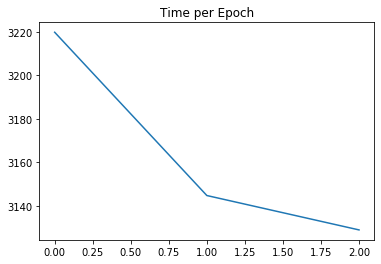

In [21]:
epoch_times = [times[i] - times[i-1] for i in range(1, len(times)) if i % 3 != 2]
print("Mean Time per Epoch:", np.mean(epoch_times))

plt.plot(range(len(epoch_times)), epoch_times)
plt.title("Time per Epoch")
plt.show()

Mean Time per Validation: 130.71324753761292


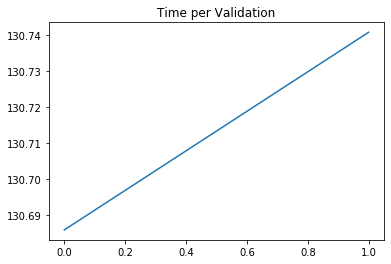

In [23]:
val_times = [times[i] - times[i-1] for i in range(1, len(times)) if i % 3 == 2]
print("Mean Time per Validation:", np.mean(val_times))

plt.plot(range(len(val_times)), val_times)
plt.title("Time per Validation")
plt.show()

## Losses

In [6]:
losses = [[]]
for row in rows:
    if row[0].isdigit():
        losses[-1].append(float(row[2]))
        
    elif len(losses[-1]) > 0:
        losses.append([])

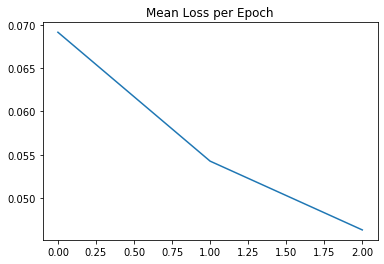

In [7]:
mean_loss_per_epoch = np.mean(losses[:-1], axis=-1)
plt.plot(range(len(mean_loss_per_epoch)), mean_loss_per_epoch)
plt.title("Mean Loss per Epoch")
plt.show()

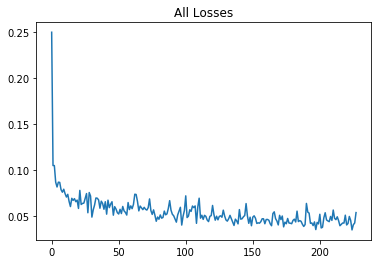

In [8]:
all_losses = [loss for l in losses for loss in l]
group = 100
all_losses = [np.mean(all_losses[i:i+group]) for i in range(0, len(all_losses), group)]
plt.plot(range(len(all_losses)), all_losses)
plt.title("All Losses")
plt.show()

## Precision

In [9]:
precisions = []
for row in rows:
    if row[0] == "precision":
        precisions.append(float(row[2]))
        
print("Mean Precision:".ljust(20), np.mean(precisions))
print("Max Precision:".ljust(20), np.max(precisions), "at", np.argmax(precisions))
print("Min Precision:".ljust(20), np.min(precisions), "at", np.argmin(precisions))

Mean Precision:      0.9891903100155053
Max Precision:       0.9897128441220238 at 1
Min Precision:       0.9886677759089869 at 0


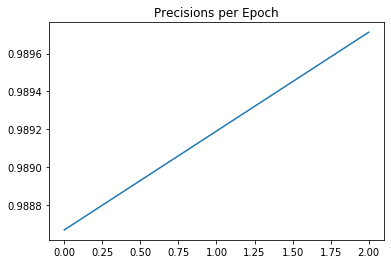

In [10]:
plt.plot(range(0, len(precisions) * 2, 2), precisions)
plt.title("Precisions per Epoch")
plt.show()

## MIoU

In [11]:
mious = []
for row in rows:
    if row[0].endswith("miou"):
        mious.append(float(row[2]))
        
print("Mean IoU:".ljust(15), np.mean(mious))
print("Max IoU:".ljust(15), np.max(mious), "at", np.argmax(mious))
print("Min IoU:".ljust(15), np.min(mious), "at", np.argmin(mious))

Mean IoU:       0.2967084481183333
Max IoU:        0.31798312287973657 at 1
Min IoU:        0.27543377335693 at 0


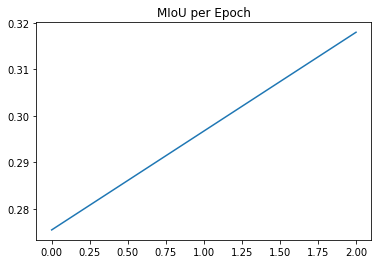

In [12]:
plt.plot(range(0, len(mious) * 2, 2), mious)
plt.title("MIoU per Epoch")
plt.show()